Gayatri Kulkarni -53004230002
Generation 1: [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1] - Fitness: 16
Generation 2: [0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1] - Fitness: 16
Generation 3: [1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1] - Fitness: 16
Generation 4: [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0] - Fitness: 15
Generation 5: [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1] - Fitness: 17
Generation 6: [1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1] - Fitness: 15
Generation 7: [1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] - Fitness: 15
Generation 8: [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1] - Fitness: 16
Generation 9: [1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] - Fitness: 17
Generation 10: [1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] - Fitness: 17
Generation 11: [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1] - F

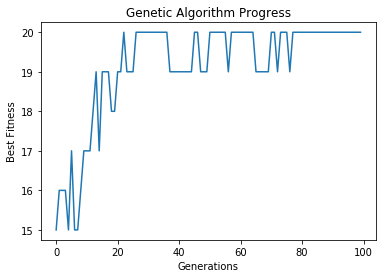

In [3]:
import random
import matplotlib.pyplot as plt

# Genetic algorithm parameters
population_size = 100
mutation_rate = 0.01
generations = 100

# function to generate a random binary string
def generate_individual(length):
    return [random.randint(0, 1) for _ in range(length)]

# function to calculate the fitness of an individual (number of 1s in the binary string)
def calculate_fitness(individual):
    return sum(individual)

# function to select individuals for the next generation (roulette wheel selection)
def select(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    normalized_fitness = [score / total_fitness for score in fitness_scores]
    selected = random.choices(population, weights=normalized_fitness, k=2)
    return selected

# function to perform one point crossover
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# function to perform mutation
def mutate(individual, rate):
    mutated = [bit if random.random() > rate else 1 - bit for bit in individual]
    return mutated

# Main Genetic Algorithm
def genetic_algorithm():
    # initialize a random population
    population = [generate_individual(20) for _ in range(population_size)]
    fitness_history = []

    for generation in range(generations):
        # calculate fitness for each individual
        fitness_scores = [calculate_fitness(individual) for individual in population]
        fitness_history.append(max(fitness_scores))

        # select parents for the next generation
        parents = [select(population, fitness_scores) for _ in range(population_size // 2)]

        # create the next generation through crossover and mutation
        next_generation = []
        for parent1, parent2 in parents:
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            next_generation.extend([child1, child2])

        population = next_generation

        # find and print the best individual in this generation
        best_individual = max(population, key=calculate_fitness)
        print(f'Generation {generation + 1}: {best_individual} - Fitness: {calculate_fitness(best_individual)}')

    # Plot fitness history
    plt.figure()
    plt.plot(range(generations), fitness_history)
    plt.xlabel('Generations')
    plt.ylabel('Best Fitness')
    plt.title('Genetic Algorithm Progress')
    plt.show()

# Run the genetic algorithm
print('Gayatri Kulkarni -53004230002')
genetic_algorithm()